<a href="https://colab.research.google.com/github/trevinofernando/AI-MachineLearning/blob/master/hw2/Hw2Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIFAR10 data set
Classification with dense layers

#Model that Underfits
The model is too simple and cannot explain the data.

## Loading the CIFAR10 data set

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 11s 0us/step


## Exploring the format of the CIFAR10 data set

In [0]:
print(train_images.shape)
print(train_images.dtype)
print(train_labels.shape)

(50000, 32, 32, 3)
uint8
(50000, 1)


## Displaying some CIFAR10 Items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

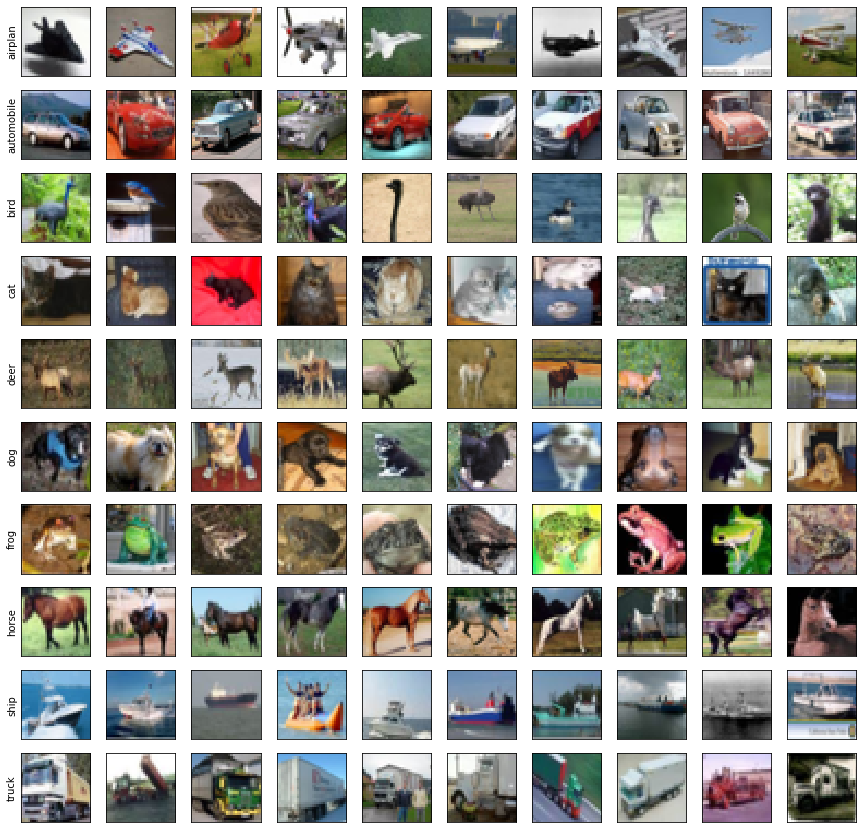

In [0]:
table = [[] for _ in range(10)]
for i in range(len(train_images)):
  label = train_labels[i, 0]
  table[label].append(i)

plt.figure(figsize=(15,15))
for class_index in range(10):
  for example_index in range(10):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    if example_index == 0:
      plt.ylabel(class_names[class_index], rotation=90)
    plt.grid(False)
    plt.imshow(train_images[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()

## Preprocess the data

In [0]:
#Re-scale data to have a value between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

##Network Architecture

###Summary

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), #input is 32*32 pixel grid by 3 color channels
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    #
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________

### Build and train the model

In [0]:
# compile the model
model.compile(optimizer='adam', #Adaptive Moment Estimation
             loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy for integers
             metrics=['accuracy'])
            

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s 247us/sample - loss: 1.5255 - acc: 0.4449 - val_loss: 1.2657 - val_acc: 0.5499
Epoch 2/10
50000/50000 [==============================] - 8s 160us/sample - loss: 1.1592 - acc: 0.5912 - val_loss: 1.0824 - val_acc: 0.6143
Epoch 3/10
50000/50000 [==============================] - 8s 165us/sample - loss: 1.0085 - acc: 0.6436 - val_loss: 0.9930 - val_acc: 0.6486
Epoch 4/10
50000/50000 [==============================] - 8s 163us/sample - loss: 0.9105 - acc: 0.6794 - val_loss: 0.9514 - val_acc: 0.6690
Epoch 5/10
50000/50000 [==============================] - 8s 161us/sample - loss: 0.8396 - acc: 0.7066 - val_loss: 0.9179 - val_acc: 0.6815
Epoch 6/10
50000/50000 [==============================] - 8s 163us/sample - loss: 0.7754 - acc: 0.7273 - val_loss: 0.9013 - val_acc: 0.6939
Epoch 7/10
50000/50000 [==============================] - 8s 162us/sample - loss: 0.7244 - acc: 0.7454 - val_

### Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 92us/sample - loss: 0.8824 - acc: 0.7105
Test accuracy: 0.7105


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



##Visualization

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

### Training and Test Loss



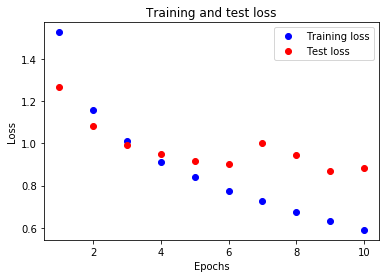

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training and Test Accuracy

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

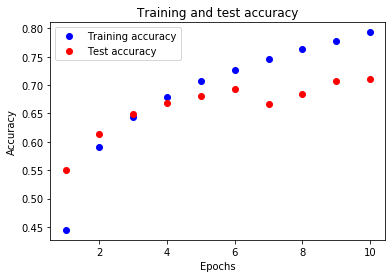

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Missclassified data

In [0]:
#Test model on Test dataset
predictions = model.predict([test_images])
#Get predictions by extracting the max on the One Hot Encoded Vector
predictions = np.argmax(predictions, axis=1) 
#Cast values to make sure it's uint8
predictions = predictions.astype('uint8')
print(predictions)

[3 8 8 ... 5 1 7]


In [0]:
(numLabels,_) = test_labels.shape
#Compare predicted labels against real labels and extract the bad predictions
wrong_indices = [i for i in range(numLabels) if predictions[i] != test_labels[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
print(1.0 - len(wrong_indices) / numLabels)

0.7105


Predicted 
deer
True label 
frog


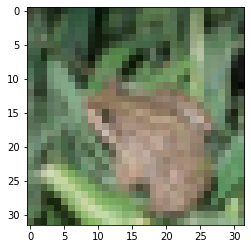

Predicted 
bird
True label 
cat


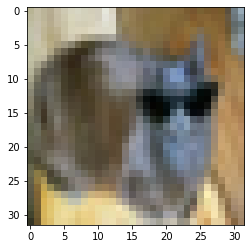

Predicted 
deer
True label 
frog


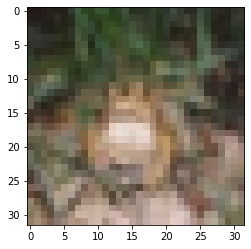

Predicted 
dog
True label 
frog


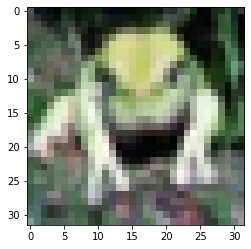

Predicted 
bird
True label 
deer


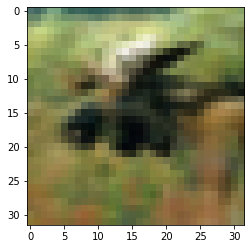

Predicted 
truck
True label 
horse


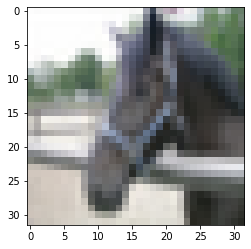

Predicted 
dog
True label 
deer


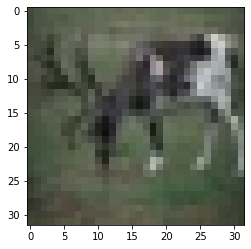

Predicted 
truck
True label 
automobile


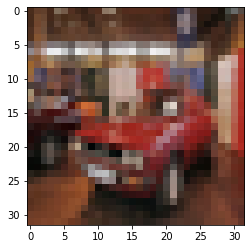

Predicted 
frog
True label 
deer


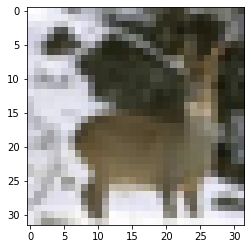

Predicted 
dog
True label 
bird


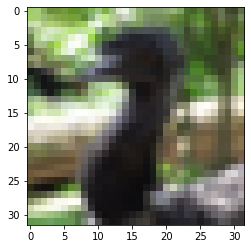

In [0]:
# This show the ith misclassified digit. 
numImages = 10
for i in range(numImages):
  wrong_index = wrong_indices[(int)(i * len(wrong_indices) / numImages)]
  print("Predicted ")
  print(class_names[predictions[wrong_index]])
  print("True label ")
  print(class_names[test_labels[wrong_index][0]])
  plt.imshow(test_images[wrong_index], cmap = plt.cm.binary)
  plt.show()

#Model that Overfits
The model is unnecessarily complex so it can easily adapt too much to the training data. In addition, the model tarins for too long, and having too much exposure to the same data will lead to Overfiting

## Loading the CIFAR10 data set

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Exploring the format of the CIFAR10 data set

In [0]:
print(train_images.shape)
print(train_images.dtype)
print(train_labels.shape)

(50000, 32, 32, 3)
uint8
(50000, 1)


## Displaying some CIFAR10 Items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

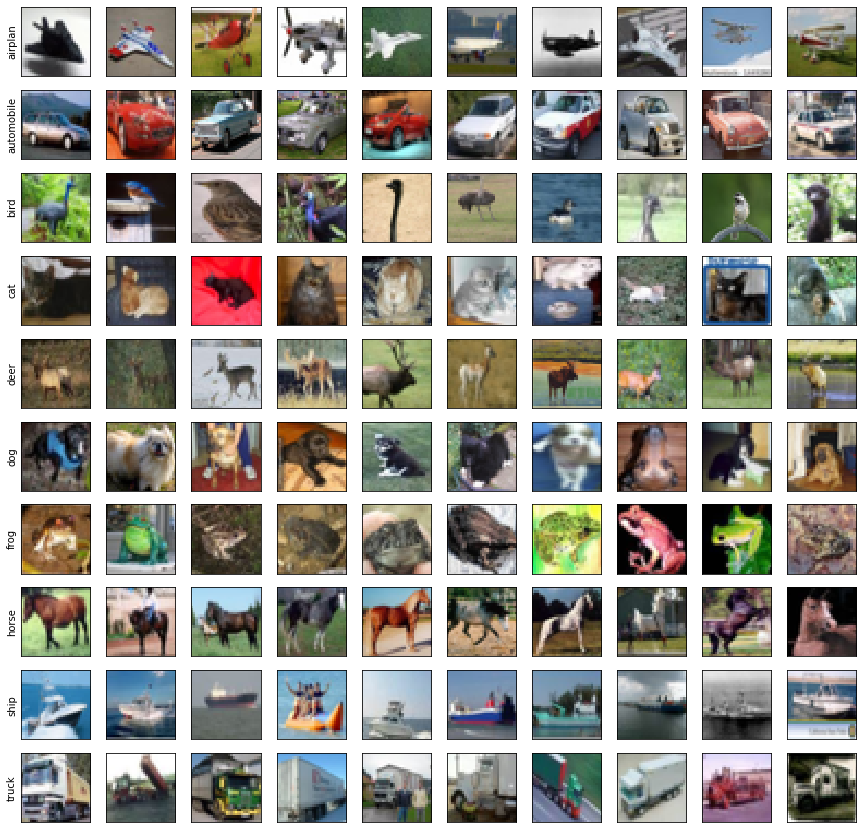

In [0]:
table = [[] for _ in range(10)]
for i in range(len(train_images)):
  label = train_labels[i, 0]
  table[label].append(i)

plt.figure(figsize=(15,15))
for class_index in range(10):
  for example_index in range(10):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    if example_index == 0:
      plt.ylabel(class_names[class_index], rotation=90)
    plt.grid(False)
    plt.imshow(train_images[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()

## Preprocess the data

In [0]:
#Re-scale data to have a value between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

##Network Architecture

###Summary

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), #input is 32*32 pixel grid by 3 color channels
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Conv2D(64, (3, 3), activation='sigmoid'),
    #
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(256, activation='sigmoid'), #Hidden layer with 1568 neurons and sigmoid(x) = 1/(1 + e^-x)
    keras.layers.Dense(64, activation='sigmoid'), #Hidden layer with 1568 neurons and sigmoid(x) = 1/(1 + e^-x)
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)             

### Build and train the model

In [0]:
# compile the model
model.compile(optimizer='adam', #Adaptive Moment Estimation
             loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy for integers
             metrics=['accuracy'])
            

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 187us/sample - loss: 0.4577 - acc: 0.8424 - val_loss: 0.9816 - val_acc: 0.6853
Epoch 2/20
50000/50000 [==============================] - 9s 181us/sample - loss: 0.3831 - acc: 0.8691 - val_loss: 1.0389 - val_acc: 0.6908
Epoch 3/20
50000/50000 [==============================] - 9s 182us/sample - loss: 0.3207 - acc: 0.8911 - val_loss: 1.0878 - val_acc: 0.6853
Epoch 4/20
50000/50000 [==============================] - 9s 182us/sample - loss: 0.2617 - acc: 0.9117 - val_loss: 1.1915 - val_acc: 0.6829
Epoch 5/20
50000/50000 [==============================] - 9s 182us/sample - loss: 0.2236 - acc: 0.9239 - val_loss: 1.3066 - val_acc: 0.6762
Epoch 6/20
50000/50000 [==============================] - 9s 180us/sample - loss: 0.1820 - acc: 0.9387 - val_loss: 1.3204 - val_acc: 0.6860
Epoch 7/20
50000/50000 [==============================] - 9s 184us/sample - loss: 0.1564 - acc: 0.9485 - val_l

### Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 98us/sample - loss: 1.8391 - acc: 0.6705
Test accuracy: 0.6705


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



##Visualization

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

### Training and Test Loss



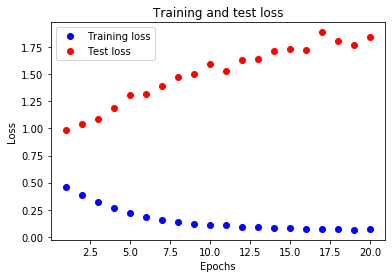

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training and Test Accuracy

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

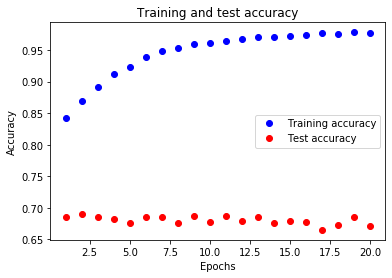

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Missclassified data

In [0]:
#Test model on Test dataset
predictions = model.predict([test_images])
#Get predictions by extracting the max on the One Hot Encoded Vector
predictions = np.argmax(predictions, axis=1) 
#Cast values to make sure it's uint8
predictions = predictions.astype('uint8')
print(predictions)

[3 8 8 ... 5 1 7]


In [0]:
(numLabels,_) = test_labels.shape
#Compare predicted labels against real labels and extract the bad predictions
wrong_indices = [i for i in range(numLabels) if predictions[i] != test_labels[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
print(1.0 - len(wrong_indices) / numLabels)

0.6705


Predicted 
deer
True label 
frog


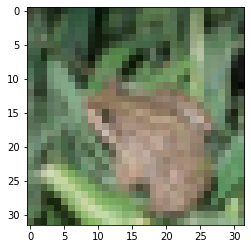

Predicted 
bird
True label 
dog


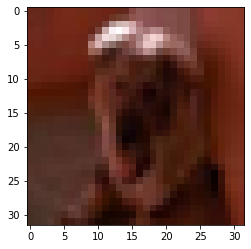

Predicted 
frog
True label 
cat


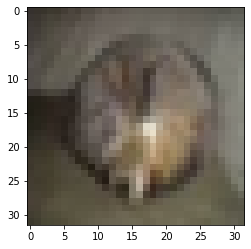

Predicted 
cat
True label 
deer


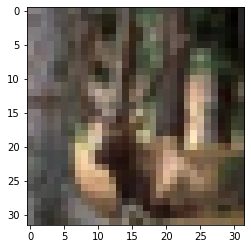

Predicted 
cat
True label 
ship


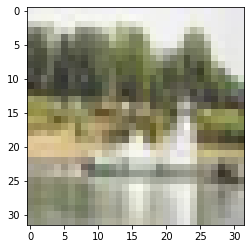

Predicted 
truck
True label 
horse


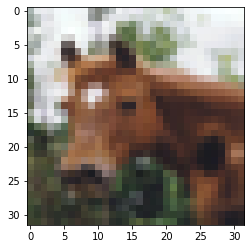

Predicted 
cat
True label 
bird


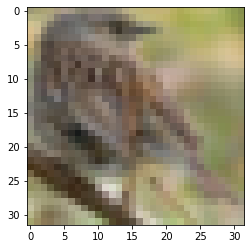

Predicted 
frog
True label 
deer


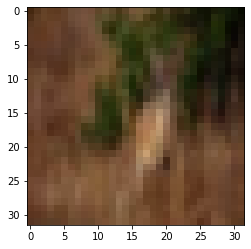

Predicted 
dog
True label 
deer


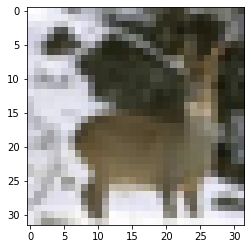

Predicted 
cat
True label 
dog


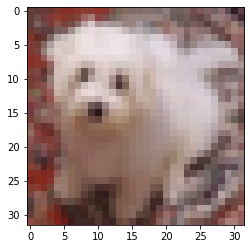

In [0]:
# This show the ith misclassified digit. 
numImages = 10
for i in range(numImages):
  wrong_index = wrong_indices[(int)(i * len(wrong_indices) / numImages)]
  print("Predicted ")
  print(class_names[predictions[wrong_index]])
  print("True label ")
  print(class_names[test_labels[wrong_index][0]])
  plt.imshow(test_images[wrong_index], cmap = plt.cm.binary)
  plt.show()

#Model that is "Pretty Good"
The model is neither too simple, nor too complex. In addition, the model didn't train for too many epochs, and I use dropout to fight overfitting.

## Loading the CIFAR10 data set

In [0]:
%tensorflow_version 1.x
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

cifar10 = keras.datasets.cifar10

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = cifar10.load_data()

class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Preprocess the data

In [0]:
train_images = train_images_original.astype('float32')
test_images = test_images_original.astype('float32')

### Calculate Z-Score

In [0]:
#z-score
mean = np.mean(train_images,axis=(0,1,2,3))
std = np.std(train_images,axis=(0,1,2,3))
train_images = (train_images-mean)/(std+1e-7)
test_images = (test_images-mean)/(std+1e-7)

In [0]:
#Re-scale data to have a value between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

###To Categorical

In [0]:
num_classes = len(class_names)
train_labels = np_utils.to_categorical(train_labels_original,num_classes)
test_labels = np_utils.to_categorical(test_labels_original,num_classes)

##Regularization

Deep neural nets with a large number of parameters are very powerful machine learning systems. However, overfitting is a serious problem in such networks.  Given below are few techniques which were proposed recently and has become a general norm these days in convolutional neural networks.

**Dropout** is a technique for addressing this problem. The key idea is to randomly drop units (along with their connections) from the neural network during training. The reduction in number of parameters in each step of training has effect of regularization. Dropout has shown improvements in the performance of neural networks on supervised learning tasks in vision, speech recognition, document classification and computational biology, obtaining state-of-the-art results on many benchmark data sets.

**Kernel_regularizer**  allows to apply penalties on layer parameters during optimization. These penalties are incorporated in the loss function that the network optimizes. This argument in convolutional layer  is nothing but L2 regularisation of the weights. This penalizes peaky weights and makes sure that all the inputs are considered. During gradient descent parameter update, the above L2 regularization ultimately means that every weight is decayed linearly, that’s why called weight decay.

**BatchNormalization** normalizes the activation of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. It addresses the problem of internal covariate shift. It also acts as a regularizer, in some cases eliminating the need for Dropout. Batch Normalization achieves the same accuracy with fewer training steps thus speeding up the training process.

##Network Architecture

###Model Summary

In [20]:
# set up the layers

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=train_images.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))#40% chance of using a given neuron
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))#Output layer with softmax for One Hot Encoding
 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)       

###Adding Data Augmentation

In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that at training time, our model will never see the exact same picture twice. This helps prevent overfitting and helps the model generalize better.

This can be done by configuring a number of random transformations to be performed on the images read by our `ImageDataGenerator` instance.

These are just a few of the options available (for more, see the Keras documentation. 

* `rotation_range` is a value in degrees (0–180), a range within which to randomly 
rotate pictures.
* `width_shift` and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [0]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(train_images)

### Build and train the model

In [0]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

# Compile the model
batch_size = 64
 
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(optimizer=opt_rms,
              loss='categorical_crossentropy', #categorical_crossentropy for One Hot Encoding
              metrics=['accuracy'])

In [23]:
# train the model
epochs = 125

#Save training history for analysis purposes later
history = model.fit_generator(datagen.flow(train_images, train_labels, batch_size=batch_size),
                              steps_per_epoch=train_images.shape[0] // batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(test_images,test_labels),
                              callbacks=[LearningRateScheduler(lr_schedule)])


Epoch 1/125
781/781 [==============================] - 23s 29ms/step - loss: 1.9241 - acc: 0.4171 - val_loss: 3.6472 - val_acc: 0.1961
Epoch 2/125
781/781 [==============================] - 22s 29ms/step - loss: 1.3364 - acc: 0.5839 - val_loss: 4.5406 - val_acc: 0.1940
Epoch 3/125
781/781 [==============================] - 21s 27ms/step - loss: 1.1702 - acc: 0.6424 - val_loss: 4.7879 - val_acc: 0.1334
Epoch 4/125
781/781 [==============================] - 21s 27ms/step - loss: 1.0487 - acc: 0.6793 - val_loss: 1.2884 - val_acc: 0.5872
Epoch 5/125
781/781 [==============================] - 21s 27ms/step - loss: 0.9714 - acc: 0.7021 - val_loss: 5.4111 - val_acc: 0.1832
Epoch 6/125
781/781 [==============================] - 21s 27ms/step - loss: 0.9090 - acc: 0.7248 - val_loss: 3.6590 - val_acc: 0.2309
Epoch 7/125
781/781 [==============================] - 21s 27ms/step - loss: 0.8738 - acc: 0.7361 - val_loss: 2.4416 - val_acc: 0.3508
Epoch 8/125
781/781 [==============================] - 

### Save Model

In [0]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 

### Load Model

In [0]:
# Load trained CNN model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('model.h5')

### Evaluate accuracy

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 93us/step
Test accuracy: 0.8416


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



##Visualization

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

### Training and Test Loss



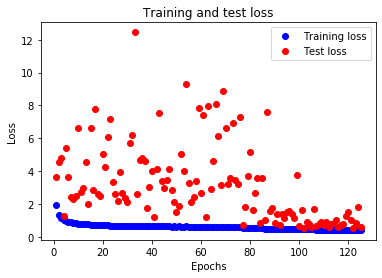

In [28]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training and Test Accuracy

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

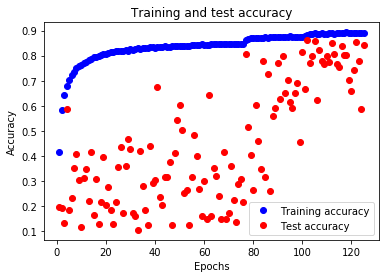

In [30]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Missclassified data

In [105]:
#Test model on Test dataset
predictions = model.predict([test_images])
#Get predictions by extracting the max on the One Hot Encoded Vector
predictions = np.argmax(predictions, axis=1) 
#Cast values to make sure it's uint8
predictions = predictions.astype('uint8')
print(predictions)

[3 8 8 ... 5 1 7]


In [109]:
(numLabels,_) = test_labels.shape
#Compare predicted labels against real labels and extract the bad predictions
wrong_indices = [i for i in range(numLabels) if predictions[i] != test_labels_original[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
print(1.0 - len(wrong_indices) / numLabels)

0.8416


Predicted 
horse
True label 
dog


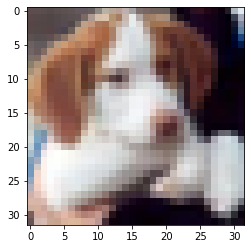

Predicted 
dog
True label 
cat


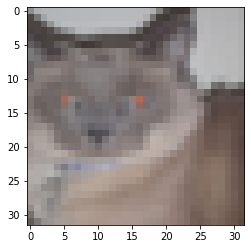

Predicted 
airplan
True label 
ship


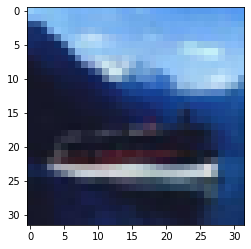

Predicted 
ship
True label 
horse


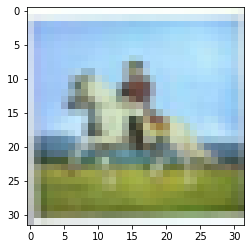

Predicted 
frog
True label 
cat


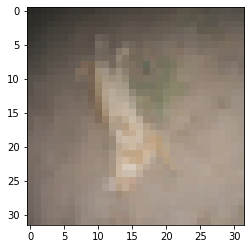

Predicted 
bird
True label 
cat


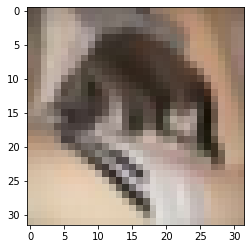

Predicted 
horse
True label 
deer


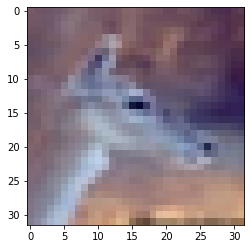

Predicted 
frog
True label 
dog


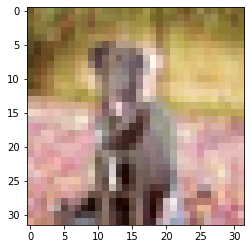

Predicted 
dog
True label 
cat


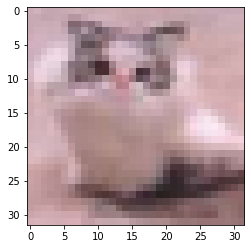

Predicted 
truck
True label 
airplan


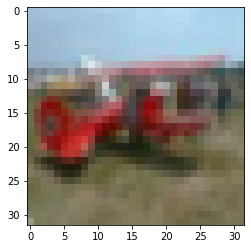

In [110]:
# This show the ith misclassified digit. 
numImages = 10
for i in range(numImages):
  wrong_index = wrong_indices[(int)(i * len(wrong_indices) / numImages)]
  print("Predicted ")
  print(class_names[predictions[wrong_index]])
  print("True label ")
  print(class_names[test_labels_original[wrong_index][0]])
  plt.imshow((test_images_original[wrong_index]), cmap = plt.cm.binary)
  plt.show()